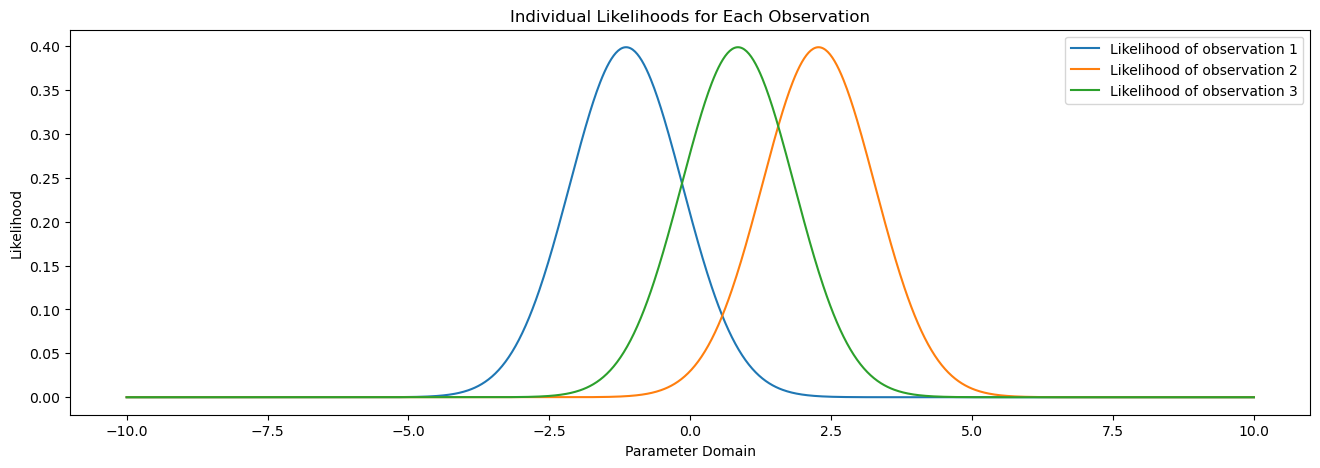

In [3]:
# 1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

individual_likelihoods = [
    stats.norm.pdf(xi*np.ones_like(parameter_domain), loc=parameter_domain, scale=1) for xi in x
]

plt.figure(figsize=(16, 5))
for i, lik in enumerate(individual_likelihoods):
    plt.plot(parameter_domain, lik, label=f"Likelihood of observation {i+1}")
plt.legend()
plt.title("Individual Likelihoods for Each Observation")
plt.xlabel("Parameter Domain")
plt.ylabel("Likelihood")
plt.show()

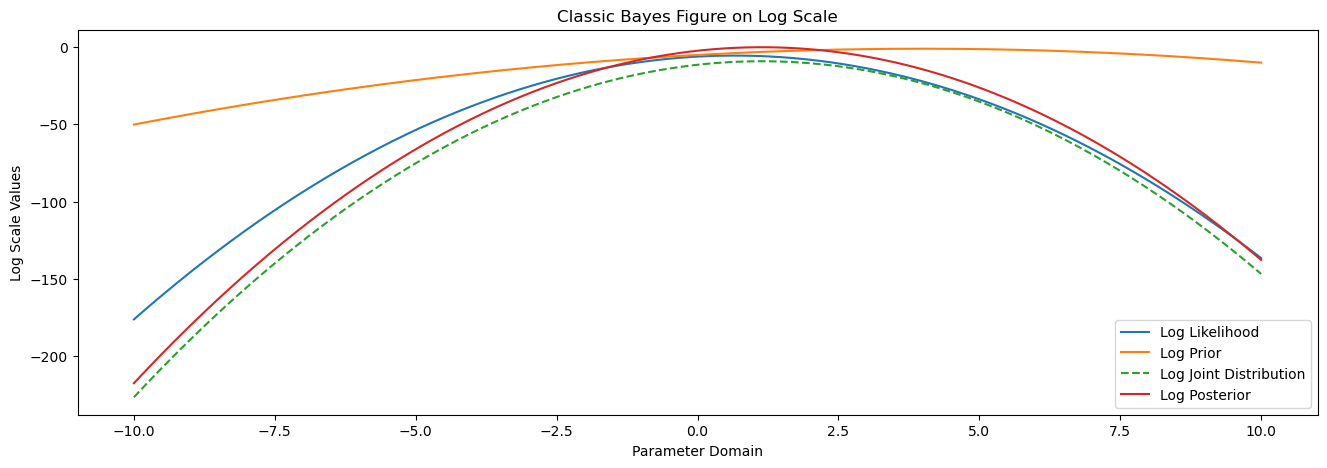

In [4]:
# 2
likelihood = stats.norm.pdf((x[:, np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).prod(axis=0)
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

log_likelihood = np.log(likelihood)
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
log_joint = log_likelihood + log_prior

posterior = stats.norm(loc=(tau*theta_0 + x.sum())/(tau + n), scale=1/(tau + n)**0.5).pdf(parameter_domain)
log_posterior = np.log(posterior)

plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, log_likelihood, label="Log Likelihood")
plt.plot(parameter_domain, log_prior, label="Log Prior")
plt.plot(parameter_domain, log_joint, linestyle="--", label="Log Joint Distribution")
plt.plot(parameter_domain, log_posterior, label="Log Posterior")
plt.legend()
plt.title("Classic Bayes Figure on Log Scale")
plt.xlabel("Parameter Domain")
plt.ylabel("Log Scale Values")
plt.show()

* 3. In Bayesian analysis, the posterior is proportional to the product of the likelihood and the prior. Since the prior is constant, the posterior is proportional to the likelihood. The resulting posterior is a normal distribution centered around the sample mean, with the variance dependent on the number of samples and the variance of the likelihood. Mathematically, the posterior $p(\theta | x)$ in this scenario will be $p(\theta|x) \propto p(x|\theta) \times p(\theta) \propto \mathcal{N}(\bar{x}, \frac{\sigma^2}{n})$.



* 4. Log likelihoods focus exclusively on the data without integrating prior beliefs. This makes them essential for computational efficiency in optimization but limits their use for full Bayesian inference, as they don't incorporate prior information. On the other hand, posteriors in the presence of improper priors become heavily data-dependent. These priors contribute no additional information, leading to posteriors shaped mainly by the likelihood. However, ensuring the posterior is a valid probability distribution can be challenging. Marginal likelihood constants, serving as normalizing factors in Bayes' theorem, ensure posteriors are valid probability distributions. Their role becomes complex with improper priors, particularly impacting Bayesian model comparison, where they are crucial for probabilistic interpretations and comparative analyses.